##### Preparing the data

In [74]:
import pandas as pd

#show all the columns and lines in the output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

# Putting AmesHousing.txt data into a dataframe - https://github.com/marcelpinheiro/malum/blob/master/AmesHousing.txt
data = pd.read_csv('AmesHousing.txt', encoding='UTF-8', delimiter='\t')
#Removing meaningless to prediction
data = data.drop(['PID','Order'], axis=1)

data




,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,FunctioNA l,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NA mes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NA mes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NA,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NA mes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NA,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NA mes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NA,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NA,GdPrv,NA,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,NA,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NA,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NA,MnPrv,NA,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,Y,80,32,0,0,0,0,NA,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,NA,Reg,Lvl,AllPub

In [75]:
#Let´s find out how many null values we have in the dataset
# print(data.isnull().sum().sort_values(ascending=False))

# Categorical boolean mask
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()


#Replace string columns do N/A
data[categorical_cols] = data[categorical_cols].fillna('N/A')
# Replace numeric columns to 0
data = data.fillna(0)



In [76]:
#We need to convert our categorical columns to numbers

from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))
data[categorical_cols].head(10)


,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,FunctioNA l,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,5,1,1,0,3,0,0,0,15,2,2,0,2,3,1,3,10,5,3,4,1,6,2,1,1,7,1,1,1,5,4,7,2,1,0,6,6,1,3,4,2,9,4
1,4,1,1,3,3,0,4,0,15,1,2,0,2,1,1,13,14,4,3,4,1,6,6,5,6,3,1,4,1,5,4,7,3,1,4,6,6,2,3,2,2,9,4
2,5,1,1,0,3,0,0,0,15,2,2,0,2,3,1,14,15,1,3,4,1,6,6,5,0,7,1,4,1,5,2,7,3,1,4,6,6,2,3,4,1,9,4
3,5,1,1,3,3,0,0,0,15,2,2,0,2,3,1,3,3,4,2,4,1,6,6,5,0,7,1,0,1,5,0,7,5,1,0,6,6,2,3,4,2,9,4
4,5,1,1,0,3,0,4,0,8,2,2,0,5,1,1,13,14,4,3,4,2,2,6,5,2,7,1,2,1,5,4,7,5,1,0,6,6,2,3,2,2,9,4
5,5,1,1,0,3,0,4,0,8,2,2,0,5,1,1,13,14,1,3,4,2,6,6,5,2,7,1,0,1,5,2,7,2,1,0,6,6,2,3,4,2,9,4
6,5,1,1,3,3,0,4,0,25,2,2,4,2,1,1,5,5,4,2,4,2,2,6,2,2,7,1,0,1,5,2,7,3,1,0,6,6,2,3,4,2,9,4
7,5,1,1,0,1,0,4,0,25,2,2,4,2,1,1,6,6,4,2,4,2,2,6,5,0,7,1,0,1,5,2,7,3,1,3,6,6,2,3,4,2,9,4
8,5,1,1,0,3,0,4,0,25,2,2,4,2,1,1,5,5,4,2,4,2,2,6,5,2,7,1,0,1,5,2,7,5,1,3,6,6,2,3,4,2,9,4
9,5,1,1,3,3,0,4,0,8,2,2,0,5,1,1,13,14,4,3,4,2,6,6,5,7,7,1,2,1,5,2,7,5,1,0,6,6,2,3,4,2,9,4


### **Features**

#### Feature selection

##### Correlation

In [77]:
# Correlation: We want to know how much correlated our target column 'SalePrice' is with the features
data_corr = data.corrwith(data['SalePrice']).sort_values(ascending=False)
print(data_corr)
data_corr = data_corr[data_corr > 0.3]
data_corr

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647562
Garage Area        0.640138
Total Bsmt SF      0.632529
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Mas Vnr Area       0.502196
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.433147
Foundation         0.406601
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Paved Drive        0.275964
Bsmt Full Bath     0.275823
2nd Flr SF         0.269373
Lot Area           0.266549
Central Air        0.264506
Roof Style         0.257170
Garage Yr Blt      0.253459
Garage Cond        0.236033
Electrical         0.234374
Sale Condition     0.230125
Garage Qual        0.209796
Lot Frontage       0.201875
Neighborhood       0.200238
Bsmt Unf SF        0.183308
House Style        0.167986
Fence              0.150889
Bedroom AbvGr      0.143913
Exterior 1st       0

SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647562
Garage Area       0.640138
Total Bsmt SF     0.632529
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Mas Vnr Area      0.502196
TotRms AbvGrd     0.495474
Fireplaces        0.474558
BsmtFin SF 1      0.433147
Foundation        0.406601
Wood Deck SF      0.327143
Open Porch SF     0.312951
dtype: float64

In [78]:
#We will use only the columns with the correlation > 0.3
data = data[data_corr.index]
data

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Full Bath,Year Remod/Add,Mas Vnr Area,TotRms AbvGrd,Fireplaces,BsmtFin SF 1,Foundation,Wood Deck SF,Open Porch SF
0,215000,6,1656,2.0,528.0,1080.0,1656,1960,1,1960,112.0,7,2,639.0,1,210,62
1,105000,5,896,1.0,730.0,882.0,896,1961,1,1961,0.0,5,0,468.0,1,140,0
2,172000,6,1329,1.0,312.0,1329.0,1329,1958,1,1958,108.0,6,0,923.0,1,393,36
3,244000,7,2110,2.0,522.0,2110.0,2110,1968,2,1968,0.0,8,2,1065.0,1,0,0
4,189900,5,1629,2.0,482.0,928.0,928,1997,2,1998,0.0,6,1,791.0,2,212,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,142500,6,1003,2.0,588.0,1003.0,1003,1984,1,1984,0.0,6,0,819.0,1,120,0
2926,131000,5,902,2.0,484.0,864.0,902,1983,1,1983,0.0,5,0,301.0,1,164,0
2927,132000,5,970,0.0,0.0,912.0,970,1992,1,1992,0.0,6,0,337.0,2,80,32
2928,170000,5,1389,2.0,418.0,1389.0,1389,1974,1,1975,0.0,6,1,1071.0,1,240,38


#### Collinearity 

Collinearity is when 2 feature columns are highly correlated and stand the risk of duplicating information. If we have 2 features that convey the same information using 2 different measures or metrics, we don't need to keep both.

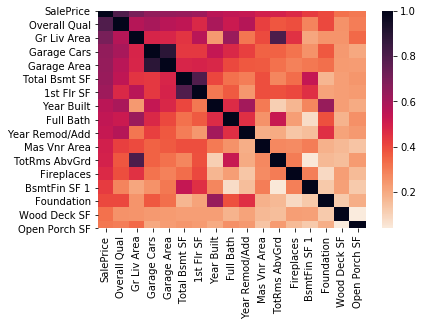

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(), cmap = sns.cm.rocket_r)


In [80]:
# Gr Liv Area and TotRms AbvGrd has high correlation; 
# Garage Area and Garage Cars too. 
# Let´s choose only one of each
data = data.drop(['Garage Area','TotRms AbvGrd'], axis=1)


##### *Variance*

In [81]:
#LowVariance
from sklearn.preprocessing import MinMaxScaler

SalePrice = data['SalePrice']
data = data.drop('SalePrice',axis=1)

scaler = MinMaxScaler()
dataScaler = scaler.fit(data)
dataScaler = scaler.transform(data)

dataScaler_df = pd.DataFrame(dataScaler, columns= data.columns)

print(dataScaler_df.var().sort_values(ascending = False))


data = data.loc[:,dataScaler_df.var() > 0.010]
data['SalePrice'] = SalePrice
data


Year Remod/Add    0.120875
Year Built        0.048035
Fireplaces        0.026238
Overall Qual      0.024580
Garage Cars       0.023173
Foundation        0.021094
Full Bath         0.019109
Mas Vnr Area      0.012465
Gr Liv Area       0.009070
Open Porch SF     0.008272
Wood Deck SF      0.007874
1st Flr SF        0.006775
BsmtFin SF 1      0.006516
Total Bsmt SF     0.005209
dtype: float64


,Overall Qual,Garage Cars,Year Built,Full Bath,Year Remod/Add,Mas Vnr Area,Fireplaces,Foundation,SalePrice
0,6,2.0,1960,1,1960,112.0,2,1,215000
1,5,1.0,1961,1,1961,0.0,0,1,105000
2,6,1.0,1958,1,1958,108.0,0,1,172000
3,7,2.0,1968,2,1968,0.0,2,1,244000
4,5,2.0,1997,2,1998,0.0,1,2,189900
...,...,...,...,...,...,...,...,...,...
2925,6,2.0,1984,1,1984,0.0,0,1,142500
2926,5,2.0,1983,1,1983,0.0,0,1,131000
2927,5,0.0,1992,1,1992,0.0,0,2,132000
2928,5,2.0,1974,1,1975,0.0,1,1,170000


In [82]:
#Agora que selecionamos nossas features, vamos converter novamente nossas categorical features para seus respectivos nomes
#e em seguida vamos usar o get_dummies do pandas para criarmos colunas com cada opção das categorical features,
#no caso apenas a Foundation

data['Foundation'] = le.inverse_transform(data['Foundation'])
data

,Overall Qual,Garage Cars,Year Built,Full Bath,Year Remod/Add,Mas Vnr Area,Fireplaces,Foundation,SalePrice
0,6,2.0,1960,1,1960,112.0,2,AdjLand,215000
1,5,1.0,1961,1,1961,0.0,0,AdjLand,105000
2,6,1.0,1958,1,1958,108.0,0,AdjLand,172000
3,7,2.0,1968,2,1968,0.0,2,AdjLand,244000
4,5,2.0,1997,2,1998,0.0,1,Alloca,189900
...,...,...,...,...,...,...,...,...,...
2925,6,2.0,1984,1,1984,0.0,0,AdjLand,142500
2926,5,2.0,1983,1,1983,0.0,0,AdjLand,131000
2927,5,0.0,1992,1,1992,0.0,0,Alloca,132000
2928,5,2.0,1974,1,1975,0.0,1,AdjLand,170000


In [83]:
data = pd.get_dummies(data)
data

,Overall Qual,Garage Cars,Year Built,Full Bath,Year Remod/Add,Mas Vnr Area,Fireplaces,SalePrice,Foundation_Abnorml,Foundation_AdjLand,Foundation_Alloca,Foundation_Family,Foundation_Normal,Foundation_Partial
0,6,2.0,1960,1,1960,112.0,2,215000,0,1,0,0,0,0
1,5,1.0,1961,1,1961,0.0,0,105000,0,1,0,0,0,0
2,6,1.0,1958,1,1958,108.0,0,172000,0,1,0,0,0,0
3,7,2.0,1968,2,1968,0.0,2,244000,0,1,0,0,0,0
4,5,2.0,1997,2,1998,0.0,1,189900,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,6,2.0,1984,1,1984,0.0,0,142500,0,1,0,0,0,0
2926,5,2.0,1983,1,1983,0.0,0,131000,0,1,0,0,0,0
2927,5,0.0,1992,1,1992,0.0,0,132000,0,0,1,0,0,0
2928,5,2.0,1974,1,1975,0.0,1,170000,0,1,0,0,0,0


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



#Here we are splitting our data with 2 pieces: train and test. Test will have 33% of data; train will have all the rest
test, train = train_test_split(data,test_size=0.33, random_state=42)

testSalePrice = test['SalePrice']
trainSalePrice = train['SalePrice']

train = train.drop(['SalePrice'], axis=1)
test = test.drop(['SalePrice'], axis=1)

model = LinearRegression()

model.fit(train, trainSalePrice) 

predict = model.predict(test)

predict

array([202378.3107    , 224193.33566548, 151356.50687777, ...,
       176080.02720208, 116647.71736644, 112311.34994683])

Excellent, we have our prediction Sale Prices! But how can we measure how accuracy is this prediction? Using the mean_squared_error from sklearn

In [85]:
from sklearn.metrics import mean_squared_error
import numpy as np

MSE = mean_squared_error(predict,testSalePrice)
RMSE = np.sqrt(MSE) 
print('MSE:',MSE,'RMSE:',RMSE)

MSE: 1693611073.2336795 RMSE: 41153.50620826468
